![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Laboratorio | Análisis de Cliente Ronda 6

Para este laboratorio, seguimos usando el archivo `marketing_customer_analysis.csv` que puede encontrar en la carpeta `files_for_lab`.

### Obtener los datos

Estamos usando el archivo `marketing_customer_analysis.csv`.

### Tratar con los datos

Ya hecho en la ronda 2.

### Explorar los datos

Hecho en la ronda 3.

### Procesando datos

(_Más procesamiento..._)

- División Xy. (_hecho_)
- Normalizar (numérico). (_hecho_)
- Una codificación Hot/Label (categórica).
- Marcos de datos Concat

### Regresión lineal

- Partida tren-prueba.
- Aplicar regresión lineal.

### Modelo de validación

- Descripción:
  - R2.
  - MSE.
  - RMSE.
  -MAE.

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-6/master/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.shape

(9134, 24)

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
data_num = data.select_dtypes(include=[np.number])
data_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
data_cat = data.select_dtypes(include=[np.object])
data_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Procesando Datos

#### - División Xy

In [9]:
# Tomamos 'Total Claim Amount' como nuestra variable dependiente
y=data['Total Claim Amount']            
X=data.drop('Total Claim Amount',axis=1)

- Normalizar (numérico)

In [10]:
# Anteriormente habiamos creado una variable llamada data_num (la cual contenia mis datos númericos unicamente)
# Creamos otra variable llamada X_num pero esta vez a mi data_nun borrando 'Total Claim Amount' que en este caso sera la variable dependiente
X_num = data_num.drop('Total Claim Amount', axis=1)
X_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [11]:
transformer=Normalizer().fit(X_num)           # hacemos el transformador llamando a Normalizer
x_normalized=transformer.transform(X_num)     # Transformamos

In [12]:
x_normalized=x_normalized.T

In [13]:
x_normalized

array([[4.90491254e-02, 9.99888829e-01, 2.55493903e-01, ...,
        9.99934829e-01, 3.24391165e-01, 9.98972589e-01],
       [9.98795451e-01, 0.00000000e+00, 9.66807936e-01, ...,
        0.00000000e+00, 9.45912819e-01, 0.00000000e+00],
       [1.22466656e-03, 1.34664469e-02, 2.14110479e-03, ...,
        1.04110242e-02, 4.13871886e-03, 2.94508782e-02],
       ...,
       [8.87439538e-05, 6.01692310e-03, 7.53351684e-04, ...,
        4.53185758e-03, 1.29334965e-04, 3.44231043e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.67447912e-04, 0.00000000e+00, 0.00000000e+00],
       [1.77487908e-05, 1.14608059e-03, 3.96500886e-05, ...,
        2.44965274e-04, 1.29334965e-04, 3.82478937e-04]])

(-0.0001, 0.001)

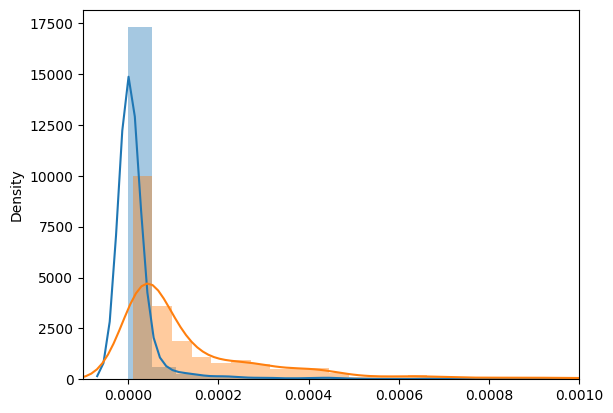

In [14]:
sns.distplot(x_normalized[5])
sns.distplot(x_normalized[6])
plt.xlim(-0.0001,.001)

## OHE (OneHotEncoder)

In [15]:
# Vamos a aplicar esto para la columna ['Gender']
# creamos un objeto dummy_gender donde especificamos la columna que queremos aplicar esta técnica y especificamos también un prefijo
# para que le ponga este prefijo a la columna
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender')

In [16]:
dummy_gender.head()

,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [17]:
# Eliminamos la columna de 'Gender' por que ya no nos es útil dentro del ánalisis 
# Incluimos esto en nuevo DF llamado data1
data = data.drop(['Gender'],axis=1)

In [18]:
# Verificamos los cambios
data.shape

(9134, 23)

In [19]:
# Incluimos esto en nuevo DF llamado data1
data1 = pd.concat([data,dummy_gender], axis=1)

In [20]:
# Verificando
data1.shape

(9134, 25)

In [21]:
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Gender_F,Gender_M
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,56274,Suburban,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,1,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,48767,Suburban,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,43836,Rural,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1


In [22]:
# Vamos ahora a definir una función que me permita automatizar lo que hicimos anteriormente

def createdummies(data,varname):
  dummy = pd.get_dummies(data[varname], prefix=varname)       # creaamos el dummy
  data = data.drop(varname, axis=1)                           # dropeamos la columna que ya nos va a interesar para el Ánalisis 
  data = pd.concat([data,dummy], axis=1)                      # concatenamos
  return data

In [23]:
# probamos la función con una nueva variable que es 'Vehicle Size'
createdummies(data1,'Vehicle Size')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Gender_F,Gender_M,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1,0,0,1,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1,0,0,1,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,0,1,0,1,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,71941,Urban,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,0,1,0,1,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,21604,Suburban,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1,0,0,1,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,0,Suburban,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,0,1,0,1,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,21941,Suburban,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,0,1,1,0,0


In [24]:
data2 = createdummies(data1,'Vehicle Size')

In [25]:
data2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Gender_F,Gender_M,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1,0,0,1,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1,0,0,1,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,0,1,0,1,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,71941,Urban,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,0,1,0,1,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,21604,Suburban,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,1,0,0,1,0
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,0,Suburban,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,0,1,0,1,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,21941,Suburban,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,0,1,1,0,0


In [26]:
X_cat=data.select_dtypes(include='object')

encoder=OneHotEncoder(drop='first').fit(X_cat)
encoded=encoder.transform(X_cat).toarray()

## Label Encoder

In [27]:
# Aplicaremos este método para la columna ['Coverage'] de nuestro DF data2
data2.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Gender_F                           uint8
Gender_M                           uint8
Vehicle Size_Lar

In [28]:
data2['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [29]:
data2['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [30]:
le = LabelEncoder()

# aplicamos a la columna deseada 
data2['Coverage'] = le.fit_transform(data2['Coverage'])

In [31]:
data2.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Gender_F,Gender_M,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,Washington,2763.519279,No,0,Bachelor,2/24/11,Employed,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1,0,0,1,0
1,QZ44356,Arizona,6979.535903,No,1,Bachelor,1/31/11,Unemployed,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1,0,0,1,0
2,AI49188,Nevada,12887.431650,No,2,Bachelor,2/19/11,Employed,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1,0,0,1,0
3,WW63253,California,7645.861827,No,0,Bachelor,1/20/11,Unemployed,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,0,1,0,1,0
4,HB64268,Washington,2813.692575,No,0,Bachelor,2/3/11,Employed,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0,1,0,1,0


In [32]:
# Comprobamos 
data2.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                           int64
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Gender_F                           uint8
Gender_M                           uint8
Vehicle Size_Lar

In [33]:
data2['Coverage'].unique()

array([0, 1, 2])

In [34]:
data2['Coverage'].value_counts()

0    5568
1    2742
2     824
Name: Coverage, dtype: int64

## Regresión lineal

- Partida tren-prueba.
- Aplicar regresión lineal.

## Modelo de validación

  - R2.
  - MSE.
  - RMSE.
  -MAE.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Definiendo las variables para el entrenamiento
X_num = data_num.drop('Total Claim Amount', axis=1)
X=np.concatenate((X_num,encoded),axis=1)
y= data_num['Total Claim Amount']

X_train,X_test,y_train,y_test=train_test_split(X_num,y,test_size=0.2)

In [37]:
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [38]:
predictions=lm.predict(X_train)
predictions

array([412.61113782, 364.33949322, 484.77247768, ..., 268.91518259,
       329.34455056, 310.82484129])

In [39]:
# Con LinearRegression tenemos una predicción de .51
r2_score(y_train,predictions)

0.5211914049557889

In [40]:
predictions=lm.predict(X_test)

In [41]:
r2_score(y_test,predictions)

0.5074104869620113

In [42]:
mse = mean_squared_error(y_test,predictions)
print(mse)

39450.706533063836


In [43]:
# Se puede realizar por diferentes métodos y comparar predicciones
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

X_num = data_num.drop('Total Claim Amount', axis=1)

transformer=StandardScaler().fit(X_num)
x_ss=transformer.transform(X_num)

transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)


transformer=MinMaxScaler().fit(X_num)
x_mm=transformer.transform(X_num)

X_ss=np.concatenate((x_ss,encoded),axis=1)
X_norm=np.concatenate((x_norm,encoded),axis=1)
X_mm=np.concatenate((x_mm,encoded),axis=1)